In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

In [2]:
#dataset
df=pd.read_csv("bank_customers_churn_data.csv")

In [3]:
#head
df.head()

,Customer Name,Age,Gender,Marital Status,Education Level,Income Level,Occupation,Account Balance,Length of Time with Bank (Months),Transaction Frequency,...,Digital Banking Usage,Customer Service Interactions,Sentiment Score,Life Event,Competitor Proximity,Market Conditions,Customer Interactions,Product Usage,Customer Satisfaction,Customer Engagement
0,Tammy Marshall,25,Female,Widowed,Bachelor's Degree,171130,Administrative,7041.427472,275,29,...,Low,8,0.297984,Marriage,Moderate,Good,39,Medium,3,3
1,Patricia Gonzalez,44,Male,Divorced,PhD,162184,Technical,4032.429631,36,0,...,High,15,0.261897,NaN,Moderate,Fair,29,Medium,2,2
2,Patricia Miller,54,Female,Divorced,High School,135270,Skilled Labor,897.242465,161,11,...,Medium,1,0.037882,Relocation,Close,Good,16,High,4,3
3,Stephen White,29,Male,Single,Master's Degree,68251,Unskilled Labor,6215.933997,219,88,...,Medium,9,0.903614,Divorce,Moderate,Good,6,Medium,4,1
4,Erin Simon,27,Female,Widowed,High School,55962,Professional,6838.060646,42,81,...,Low,8,0.578793,Relocation,Moderate,Good,18,Medium,3,2


In [4]:
df.columns

Index(['Customer Name', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Income Level', 'Occupation', 'Account Balance',
       'Length of Time with Bank (Months)', 'Transaction Frequency',
       'Average Transaction Amount', 'Digital Banking Usage',
       'Customer Service Interactions', 'Sentiment Score', 'Life Event',
       'Competitor Proximity', 'Market Conditions', 'Customer Interactions',
       'Product Usage', 'Customer Satisfaction', 'Customer Engagement'],
      dtype='object')

In [6]:
# Rename columns to lowercase with underscores between spaces
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

# Display the DataFrame with renamed columns
df.head()


,customer_name,age,gender,marital_status,education_level,income_level,occupation,account_balance,length_of_time_with_bank_(months),transaction_frequency,...,digital_banking_usage,customer_service_interactions,sentiment_score,life_event,competitor_proximity,market_conditions,customer_interactions,product_usage,customer_satisfaction,customer_engagement
0,Tammy Marshall,25,Female,Widowed,Bachelor's Degree,171130,Administrative,7041.427472,275,29,...,Low,8,0.297984,Marriage,Moderate,Good,39,Medium,3,3
1,Patricia Gonzalez,44,Male,Divorced,PhD,162184,Technical,4032.429631,36,0,...,High,15,0.261897,NaN,Moderate,Fair,29,Medium,2,2
2,Patricia Miller,54,Female,Divorced,High School,135270,Skilled Labor,897.242465,161,11,...,Medium,1,0.037882,Relocation,Close,Good,16,High,4,3
3,Stephen White,29,Male,Single,Master's Degree,68251,Unskilled Labor,6215.933997,219,88,...,Medium,9,0.903614,Divorce,Moderate,Good,6,Medium,4,1
4,Erin Simon,27,Female,Widowed,High School,55962,Professional,6838.060646,42,81,...,Low,8,0.578793,Relocation,Moderate,Good,18,Medium,3,2


In [7]:
df.columns

Index(['customer_name', 'age', 'gender', 'marital_status', 'education_level',
       'income_level', 'occupation', 'account_balance',
       'length_of_time_with_bank_(months)', 'transaction_frequency',
       'average_transaction_amount', 'digital_banking_usage',
       'customer_service_interactions', 'sentiment_score', 'life_event',
       'competitor_proximity', 'market_conditions', 'customer_interactions',
       'product_usage', 'customer_satisfaction', 'customer_engagement'],
      dtype='object')

In [9]:
# Distinct counts
columns_to_count = ['age', 'gender', 'marital_status', 'education_level', 'occupation']

# Calculate distinct counts for each column
distinct_counts = {}
for column in columns_to_count:
    distinct_counts[column] = df[column].nunique()

# Display distinct counts
for column, count in distinct_counts.items():
    print(f"Distinct count of {column}: {count}")

Distinct count of age: 72
Distinct count of gender: 2
Distinct count of marital_status: 4
Distinct count of education_level: 4
Distinct count of occupation: 6


In [10]:
# Value counts for demographics
columns_to_count = ['age', 'gender', 'marital_status', 'education_level', 'occupation']

# Calculate value counts for each column
for column in columns_to_count:
    counts = df[column].value_counts()
    print(f"Value counts for {column}:")
    print(counts)
    print()


Value counts for age:
age
65    163
22    162
29    157
45    156
41    152
     ... 
64    124
27    122
63    118
77    114
80    108
Name: count, Length: 72, dtype: int64

Value counts for gender:
gender
Female    5060
Male      4940
Name: count, dtype: int64

Value counts for marital_status:
marital_status
Divorced    2543
Married     2493
Single      2487
Widowed     2477
Name: count, dtype: int64

Value counts for education_level:
education_level
Bachelor's Degree    2573
High School          2503
Master's Degree      2487
PhD                  2437
Name: count, dtype: int64

Value counts for occupation:
occupation
Managerial         1710
Professional       1694
Administrative     1685
Unskilled Labor    1669
Technical          1635
Skilled Labor      1607
Name: count, dtype: int64



In [11]:
# Value counts for other variables
columns_to_count = ['digital_banking_usage', 'life_event', 'competitor_proximity', 'market_conditions', 'product_usage', 'customer_satisfaction', 'customer_engagement']

# Calculate value counts for each column
for column in columns_to_count:
    counts = df[column].value_counts()
    print(f"Value counts for {column}:")
    print(counts)
    print()


Value counts for digital_banking_usage:
digital_banking_usage
Medium    3347
High      3334
Low       3319
Name: count, dtype: int64

Value counts for life_event:
life_event
Relocation    2040
Marriage      2000
Divorce       1988
Birth         1960
Name: count, dtype: int64

Value counts for competitor_proximity:
competitor_proximity
Close       3467
Moderate    3379
Far         3154
Name: count, dtype: int64

Value counts for market_conditions:
market_conditions
Fair    3367
Poor    3317
Good    3316
Name: count, dtype: int64

Value counts for product_usage:
product_usage
Low       3373
High      3318
Medium    3309
Name: count, dtype: int64

Value counts for customer_satisfaction:
customer_satisfaction
1    2573
2    2516
3    2506
4    2405
Name: count, dtype: int64

Value counts for customer_engagement:
customer_engagement
4    2526
3    2513
2    2507
1    2454
Name: count, dtype: int64



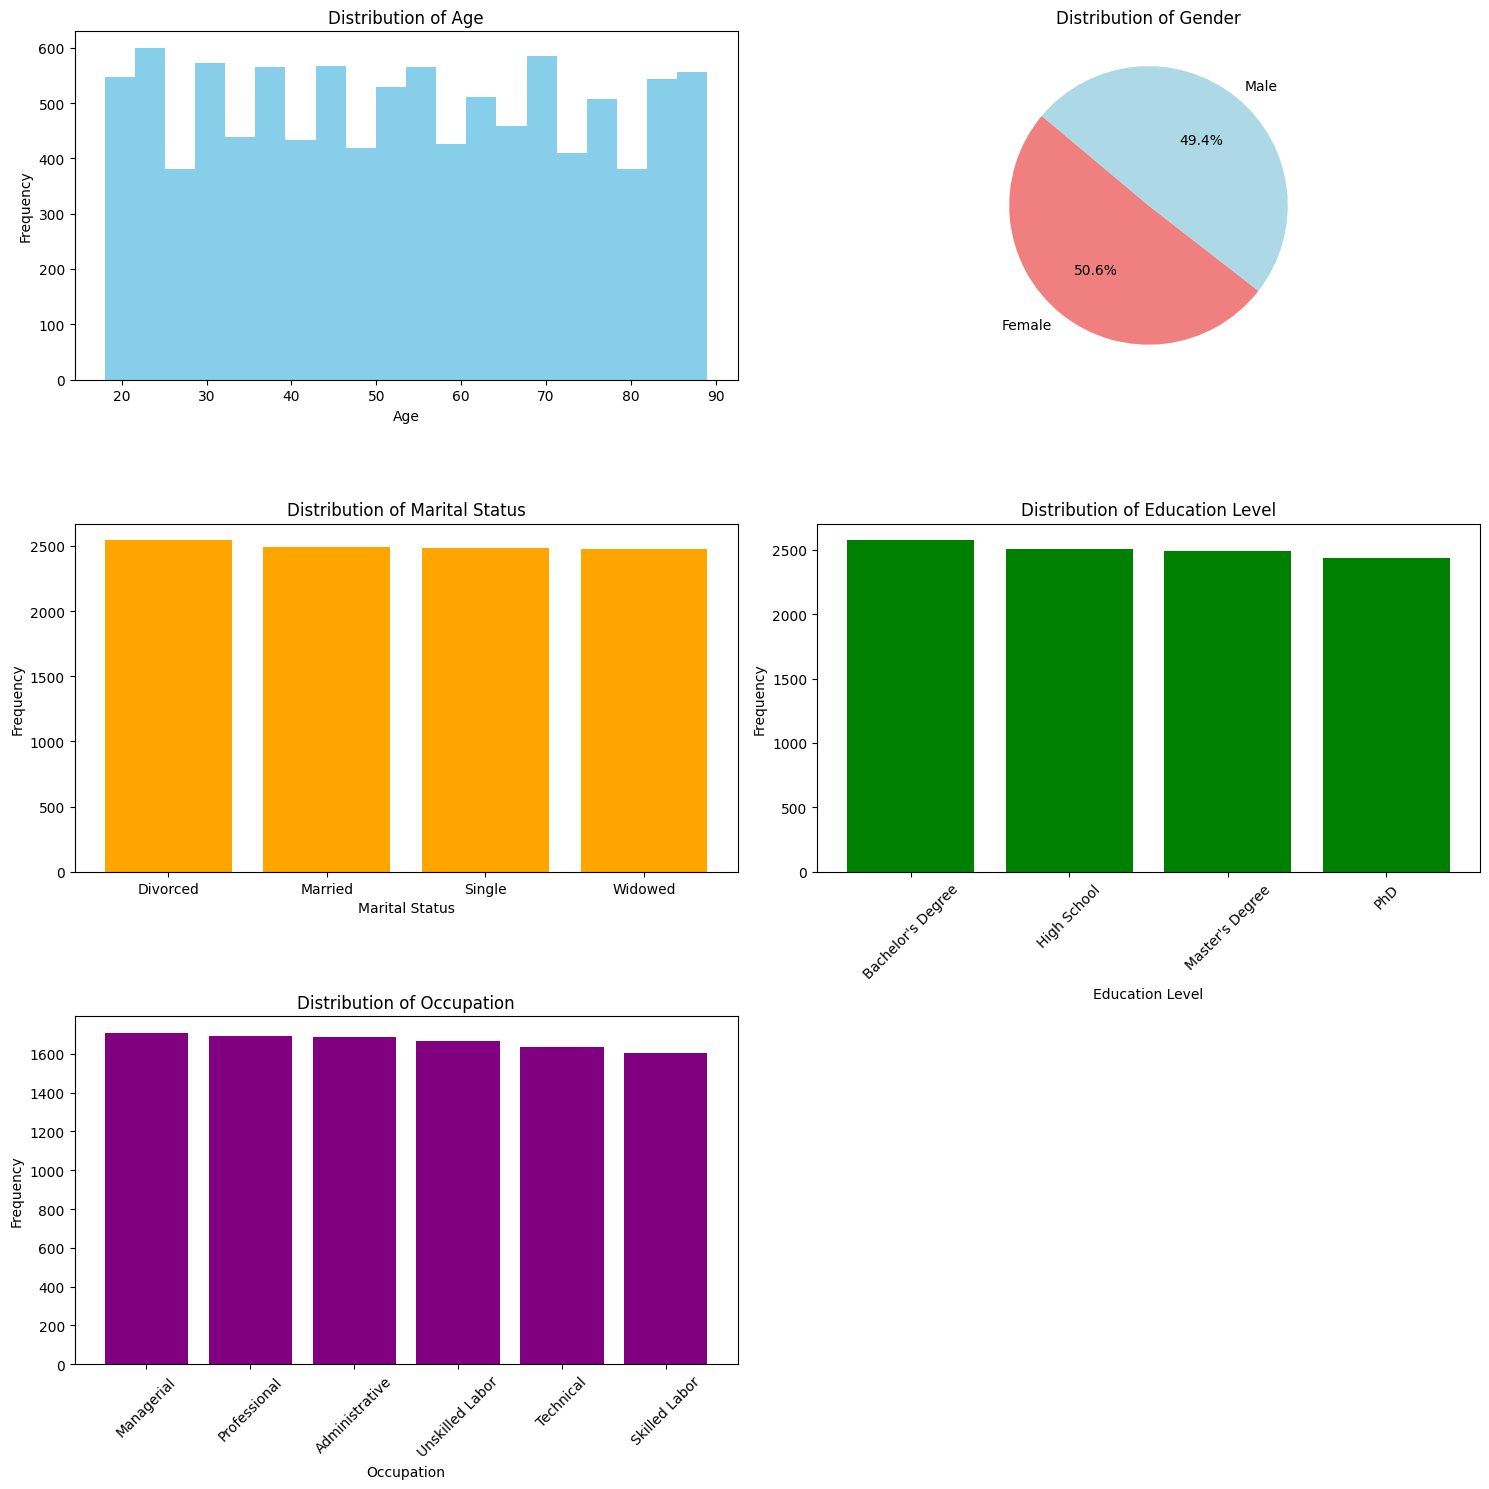

In [15]:
# visuals for 'age', 'gender', 'marital_status', 'education_level', 'occupation'
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Visualize 'age'
df['age'].plot(kind='hist', ax=axes[0, 0], bins=20, color='skyblue')
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Visualize 'gender'
gender_counts = df['gender'].value_counts()
axes[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
axes[0, 1].set_title('Distribution of Gender')

# Visualize 'marital_status'
marital_status_counts = df['marital_status'].value_counts()
axes[1, 0].bar(marital_status_counts.index, marital_status_counts.values, color='orange')
axes[1, 0].set_title('Distribution of Marital Status')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Frequency')

# Visualize 'education_level'
education_level_counts = df['education_level'].value_counts()
axes[1, 1].bar(education_level_counts.index, education_level_counts.values, color='green')
axes[1, 1].set_title('Distribution of Education Level')
axes[1, 1].set_xlabel('Education Level')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].tick_params(axis='x', rotation=45)

# Visualize 'occupation'
occupation_counts = df['occupation'].value_counts()
axes[2, 0].bar(occupation_counts.index, occupation_counts.values, color='purple')
axes[2, 0].set_title('Distribution of Occupation')
axes[2, 0].set_xlabel('Occupation')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].tick_params(axis='x', rotation=45)

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('demographic_visualization.png')


# Show the plots
plt.show()


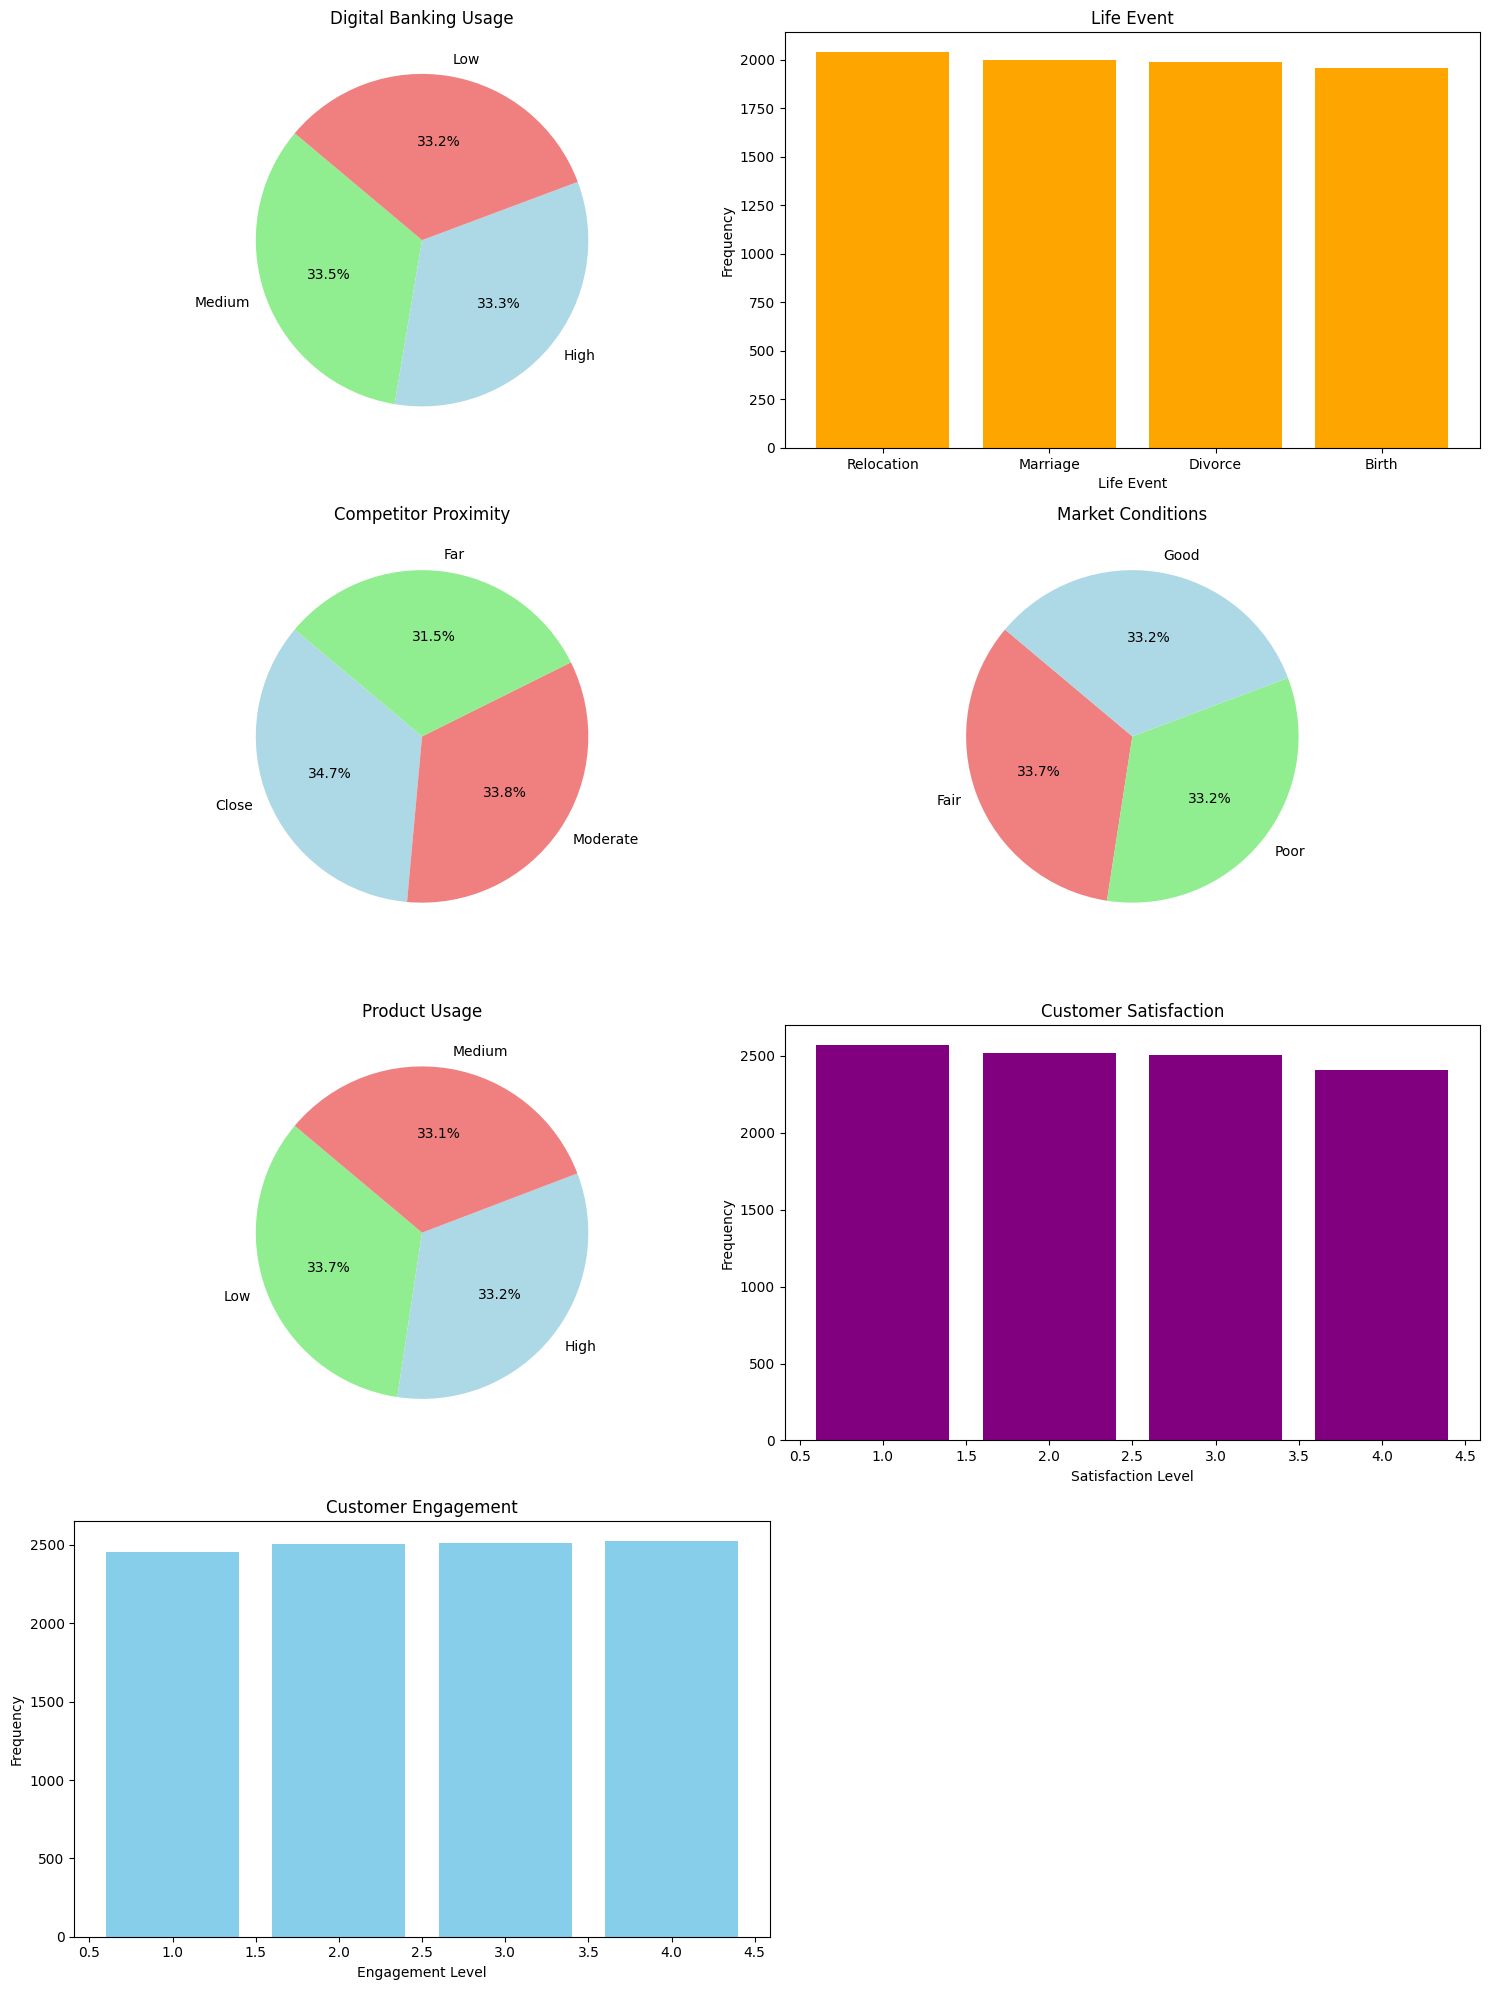

In [16]:
# visuals for 'digital_banking_usage', 'life_event', 'competitor_proximity', 'market_conditions', 'product_usage', 'customer_satisfaction', 'customer_engagement'
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Visualize 'digital_banking_usage'
digital_banking_counts = df['digital_banking_usage'].value_counts()
axes[0, 0].pie(digital_banking_counts, labels=digital_banking_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'lightcoral'])
axes[0, 0].set_title('Digital Banking Usage')

# Visualize 'life_event'
life_event_counts = df['life_event'].value_counts()
axes[0, 1].bar(life_event_counts.index, life_event_counts.values, color='orange')
axes[0, 1].set_title('Life Event')
axes[0, 1].set_xlabel('Life Event')
axes[0, 1].set_ylabel('Frequency')

# Visualize 'competitor_proximity'
competitor_proximity_counts = df['competitor_proximity'].value_counts()
axes[1, 0].pie(competitor_proximity_counts, labels=competitor_proximity_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1, 0].set_title('Competitor Proximity')

# Visualize 'market_conditions'
market_conditions_counts = df['market_conditions'].value_counts()
axes[1, 1].pie(market_conditions_counts, labels=market_conditions_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightblue'])
axes[1, 1].set_title('Market Conditions')

# Visualize 'product_usage'
product_usage_counts = df['product_usage'].value_counts()
axes[2, 0].pie(product_usage_counts, labels=product_usage_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'lightcoral'])
axes[2, 0].set_title('Product Usage')

# Visualize 'customer_satisfaction'
customer_satisfaction_counts = df['customer_satisfaction'].value_counts()
axes[2, 1].bar(customer_satisfaction_counts.index, customer_satisfaction_counts.values, color='purple')
axes[2, 1].set_title('Customer Satisfaction')
axes[2, 1].set_xlabel('Satisfaction Level')
axes[2, 1].set_ylabel('Frequency')

# Visualize 'customer_engagement'
customer_engagement_counts = df['customer_engagement'].value_counts()
axes[3, 0].bar(customer_engagement_counts.index, customer_engagement_counts.values, color='skyblue')
axes[3, 0].set_title('Customer Engagement')
axes[3, 0].set_xlabel('Engagement Level')
axes[3, 0].set_ylabel('Frequency')

# Remove the empty subplot
fig.delaxes(axes[3, 1])

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('visualizations.png')

# Show the plots
plt.show()



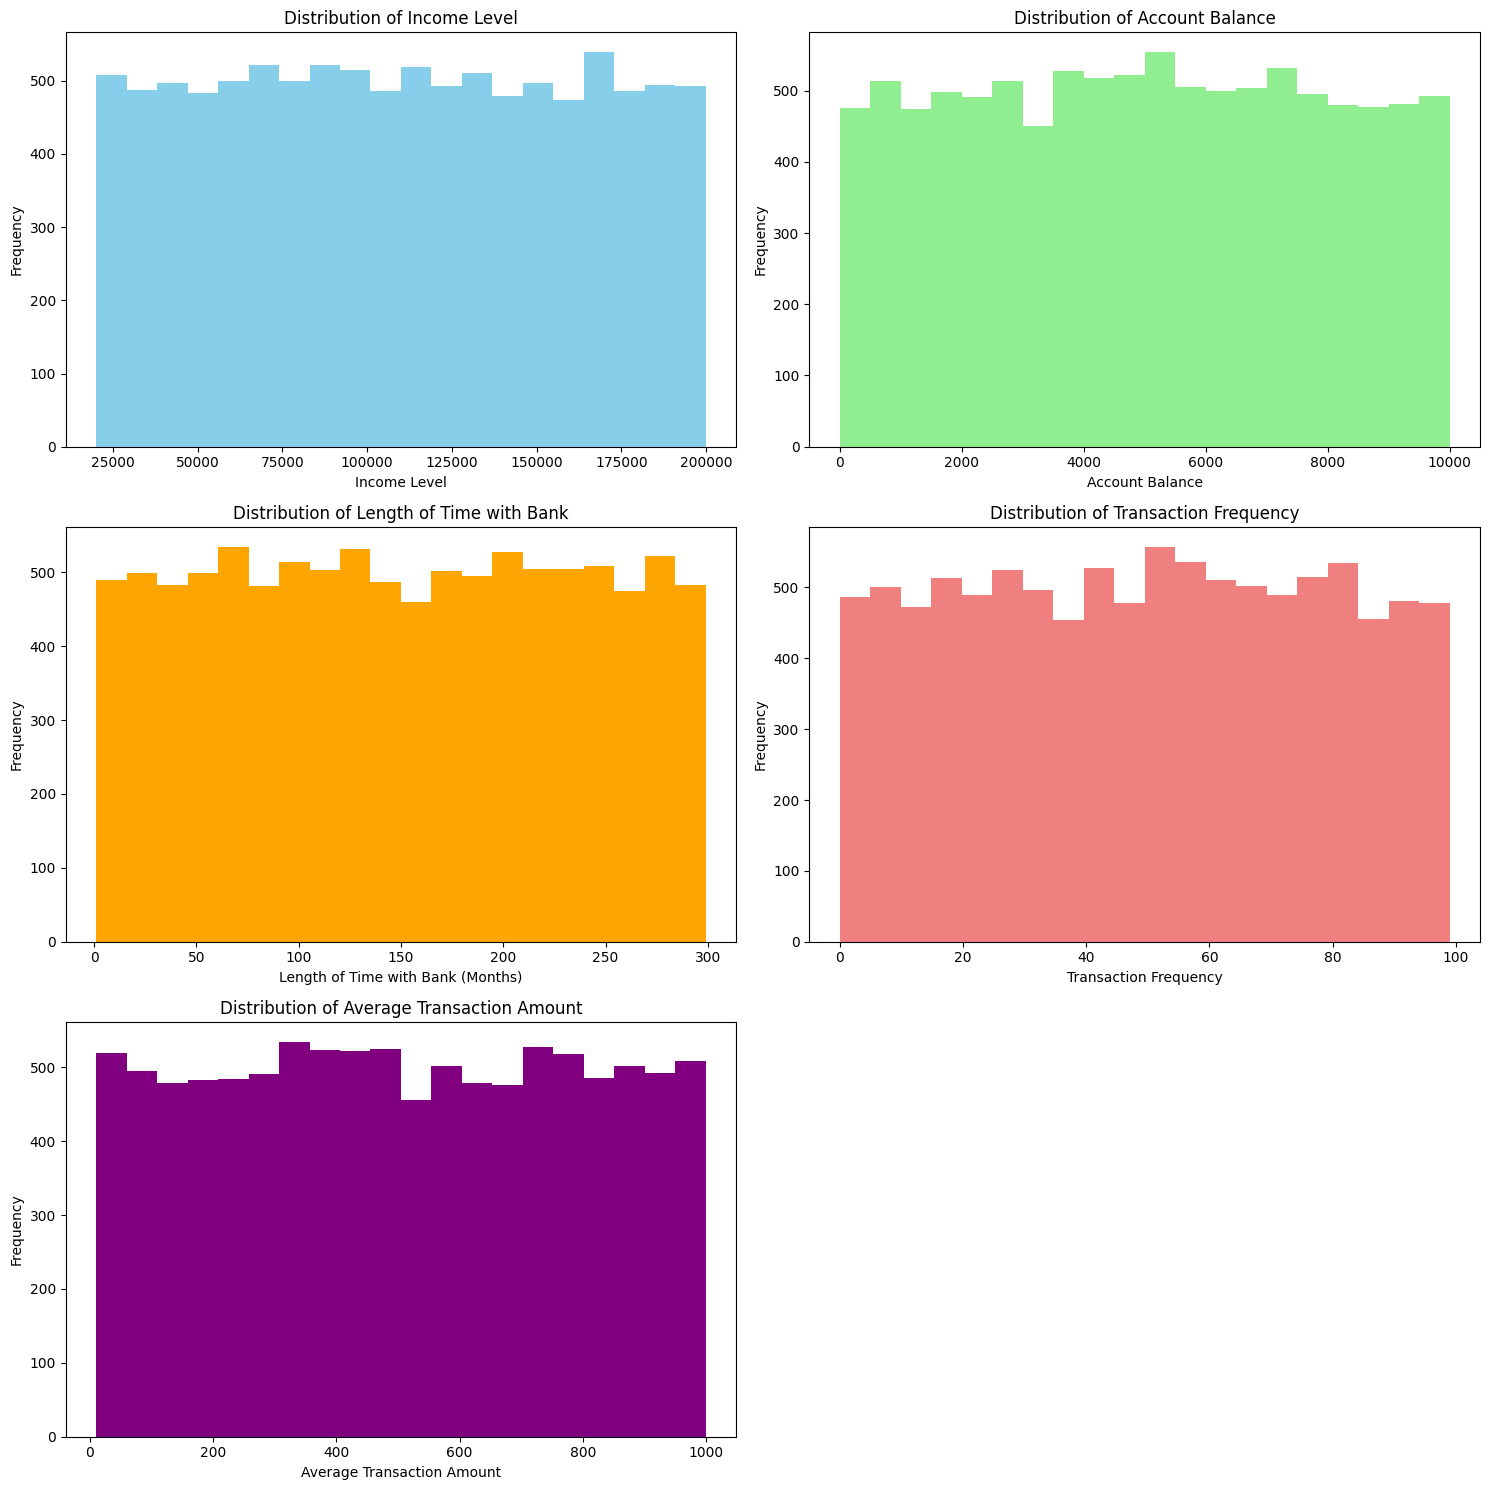

In [19]:
#income and transaction visuals
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Visualize 'income_level'
axes[0, 0].hist(df['income_level'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribution of Income Level')
axes[0, 0].set_xlabel('Income Level')
axes[0, 0].set_ylabel('Frequency')

# Visualize 'account_balance'
axes[0, 1].hist(df['account_balance'], bins=20, color='lightgreen')
axes[0, 1].set_title('Distribution of Account Balance')
axes[0, 1].set_xlabel('Account Balance')
axes[0, 1].set_ylabel('Frequency')

# Visualize 'length_of_time_with_bank_(months)'
axes[1, 0].hist(df['length_of_time_with_bank_(months)'], bins=20, color='orange')
axes[1, 0].set_title('Distribution of Length of Time with Bank')
axes[1, 0].set_xlabel('Length of Time with Bank (Months)')
axes[1, 0].set_ylabel('Frequency')

# Visualize 'transaction_frequency'
axes[1, 1].hist(df['transaction_frequency'], bins=20, color='lightcoral')
axes[1, 1].set_title('Distribution of Transaction Frequency')
axes[1, 1].set_xlabel('Transaction Frequency')
axes[1, 1].set_ylabel('Frequency')

# Visualize 'average_transaction_amount'
axes[2, 0].hist(df['average_transaction_amount'], bins=20, color='purple')
axes[2, 0].set_title('Distribution of Average Transaction Amount')
axes[2, 0].set_xlabel('Average Transaction Amount')
axes[2, 0].set_ylabel('Frequency')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('income_and_transactions_visualizations.png')

# Show the plots
plt.show()

